In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

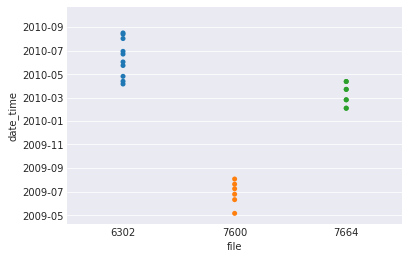

In [91]:
data_dir = os.path.join('.','data')

ref = pd.read_excel(os.path.join(data_dir, 'GroundTruths.xlsx'), 
                    names=['file', 'date_time'])
ref.date_time = pd.to_datetime(ref.date_time)
# sns.rugplot(ref['event DateTime'])
with sns.axes_style(style='darkgrid'):
    sns.stripplot(y=ref['date_time'], x=ref['file'])# ref

In [67]:
df = pd.concat([pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), 
                             index_col=0, parse_dates=True),
                pd.read_csv(os.path.join(data_dir, 'data_7600.csv'), 
                             index_col=0, parse_dates=True),
                pd.read_csv(os.path.join(data_dir, 'data_7664.csv'), 
                             index_col=0, parse_dates=True)])

In [69]:
df.head()

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_18,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27
date_time,,,,,,,,,,,,,,,,,,,,,
2010-04-01 00:01:00,0.0,0.0,61.5508,68.6880,69.3622,69.6943,69.2811,69.1613,68.9111,68.9601,...,68.9846,67.9353,69.9003,69.6597,68.4944,70.4803,70.2361,69.0025,71.2369,70.7852
2010-04-01 00:02:00,0.0,0.0,61.5484,68.6872,69.3614,69.6929,69.2799,69.1613,68.9098,68.9595,...,68.9867,67.9348,69.9006,69.6606,68.4947,70.4810,70.2352,69.0017,71.2356,70.7840
2010-04-01 00:03:00,0.0,0.0,61.5460,68.6864,69.3606,69.6915,69.2787,69.1613,68.9085,68.9589,...,68.9887,67.9343,69.9010,69.6615,68.4951,70.4818,70.2343,69.0009,71.2343,70.7828
2010-04-01 00:04:00,0.0,0.0,61.5437,68.6856,69.3597,69.6900,69.2776,69.1614,68.9073,68.9583,...,68.9907,67.9337,69.9014,69.6624,68.4955,70.4825,70.2334,69.0001,71.2331,70.7815
2010-04-01 00:05:00,0.0,0.0,61.5413,68.6848,69.3589,69.6886,69.2764,69.1614,68.9060,68.9576,...,68.9927,67.9332,69.9017,69.6633,68.4959,70.4832,70.2325,68.9994,71.2318,70.7803


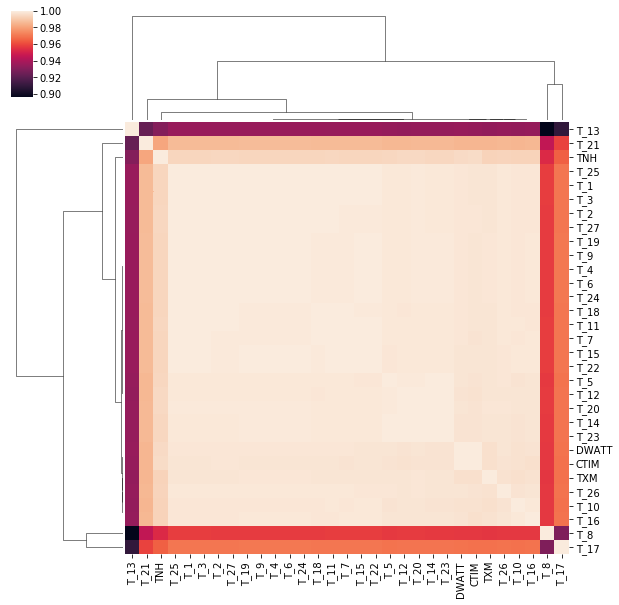

In [70]:
sns.clustermap(df.corr())

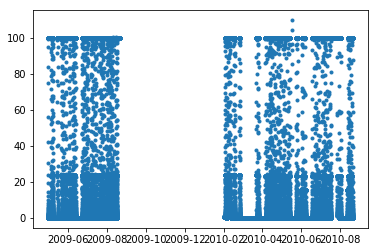

In [75]:
plt.plot(df.TNH[~((df.TNH-df.TNH.mean()).abs()>3*df.TNH.std())], '.')

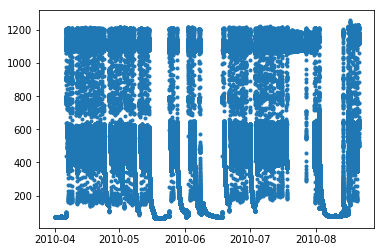

In [76]:
plt.plot(df1.T_5[~((df1.T_5-df1.T_5.mean()).abs()>3*df1.T_5.std())], '.')

In [36]:
# sns.pairplot(df1[~((df1-df1.mean()).abs()>3*df1.std())])

In [78]:
X = df.values
from sklearn.decomposition import TruncatedSVD, FastICA

pca = TruncatedSVD()

X_p = pca.fit_transform(X)

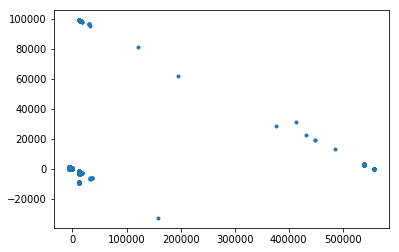

In [79]:
plt.scatter(X_p[:,0], X_p[:,1], marker='.')

In [80]:
ica = FastICA(n_components=3)
X_s = ica.fit_transform(X)

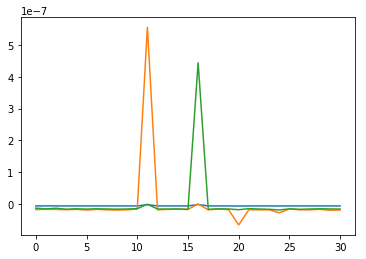

In [81]:
plt.plot(ica.components_.T)

In [103]:
df['target'] = 0
df.loc[np.isin(df.index,ref.date_time), 'target'] = 1


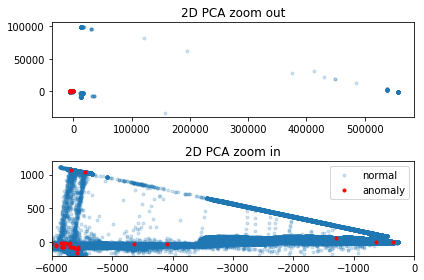

In [115]:

plt.subplot(211)
plt.title('2D PCA zoom out')
plt.scatter(X_p[df.target==0,0], X_p[df.target==0,1], marker='.', alpha=.2)
plt.scatter(X_p[df.target==1,0], X_p[df.target==1,1], marker='.', c='r')


plt.subplot(212)
plt.title('2D PCA zoom in')
plt.scatter(X_p[df.target==0,0], X_p[df.target==0,1], marker='.', alpha=.2, label='normal')
plt.scatter(X_p[df.target==1,0], X_p[df.target==1,1], marker='.', c='r', label='anomaly')
plt.xlim(-6000, 0)
plt.ylim(-200, 1200)
plt.legend()

# plt.scatter(X_p[df.target==0,0], X_p[df.target==0,1], marker='.')
plt.tight_layout()

In [118]:
# this is where the anomalies are
df[df.target==1]

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27,target
date_time,,,,,,,,,,,,,,,,,,,,,
2010-04-06 07:31:00,95.1555,99.9711,59.7671,1170.0348,1163.8711,1175.6909,1176.3792,1178.5258,1202.1744,1196.5774,...,1192.9768,1190.3556,1184.4979,1181.5865,1174.4514,1175.1837,1170.1671,1164.2290,1161.8461,1
2010-04-12 21:05:00,157.0701,100.0348,48.7546,1093.7539,1109.0712,1090.2693,1091.6812,1076.5453,1089.1886,1098.6168,...,1099.8911,1067.2374,1099.6715,1056.5010,1115.6212,1090.3802,1133.6750,1099.6610,1128.0303,1
2010-04-13 08:57:00,129.4635,100.0002,52.7964,1127.8279,1123.7460,1159.3987,1149.5083,1141.5543,1116.9581,1133.3145,...,1168.4109,1132.4207,1127.5273,1098.8630,1108.0013,1106.2346,1152.6569,1125.7911,1168.2329,1
2010-04-26 05:20:00,23.8656,99.9507,75.1213,913.6279,944.1394,945.7621,951.7084,947.2372,947.9105,940.9503,...,890.4365,914.7272,917.4006,933.0939,933.8350,927.6166,923.3457,927.9372,928.7457,1
2010-05-24 07:37:00,56.2702,99.9752,89.8001,1147.6472,1192.4578,1184.8370,1193.1808,1179.3240,1172.8927,1156.6599,...,1161.3423,1173.3826,1173.1793,1174.3228,1166.3435,1182.9591,1189.6237,1188.0815,1194.1360,1
2010-06-02 14:10:00,130.8187,99.9623,80.6542,1121.0172,1145.0847,1134.2438,1112.6813,1108.3149,1135.5708,1097.1516,...,1111.8019,1136.5642,1101.8743,1119.3557,1110.5737,1136.3397,1113.6185,1140.9794,1125.3053,1
2010-06-22 22:48:00,117.1322,99.9974,71.0240,1138.3114,1147.2961,1161.2864,1144.9658,1140.2866,1136.4355,1141.7573,...,1178.9954,1166.8018,1142.2820,1144.9435,1131.6482,1118.5234,1149.0725,1134.1562,1160.1704,1
2010-06-30 00:54:00,109.1035,99.9838,62.2478,1154.2511,1181.2008,1183.0404,1166.4819,1159.0300,1171.1492,1136.4343,...,1175.6277,1190.2013,1177.9436,1155.3538,1156.5703,1138.3688,1148.1863,1150.2976,1152.3303,1
2010-08-02 05:15:00,48.4559,99.9730,95.2368,1124.8823,1164.8356,1164.0388,1162.5740,1156.5762,1155.6281,1140.5326,...,1126.3977,1142.5299,1140.8418,1144.2646,1133.9426,1144.1793,1148.9811,1154.3540,1163.7754,1


In [121]:
# store = pd.HDFStore(os.path.join(data_dir, 'completeDB.h5'),complevel=9, complib='bzip2')
# store['df'] = df
# store.close()
df.to_excel(os.path.join(data_dir, 'completeDB.xlsx'))